Docker image built with [Dockerfile](https://github.com/joelitam2021/Opt_avanzada_proy_final/blob/main/dockerfiles/pkg/Dockerfile)

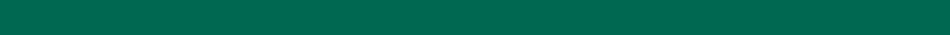

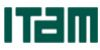

## **Maestría en Ciencia de Datos**
### Temas Selectos de Modelado. Primavera 2022.

#### **Equipo 1** 

- Nyrma Paulina Hernández Trejo
- Aide Jazmín González Cruz
- Joel Jaramillo Pacheco
- Jesús Enrique Miranda Blanco

<br>

<div align="center"><h1>Proyecto final</h1></div>
<div align="center"><h1>Arbitrage Identification Cycle in Crypto Trading</h1></div>


### Objetivo

Resolver el tema de “Ciclo de identificación de arbitraje en el comercio de criptomonedas”, a través de encontrar  el camino más corto en un grafo dirigido ponderado, usando el método de Bellman Ford.

### Importando librerías

In [1]:
from opt2.preprocessing import get_data, data_to_graph, create_grap, show_graph
from opt2.bf_cython2 import bf_negative_cycle_cc
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
from datetime import datetime

### Carga de datos

#### Caso 1: Datos al azar

In [22]:
df1 = get_data('data/historical_data.csv', '2022-05-01', 100, 'Open')
print(df1.shape)
df1.head()

(100, 2)


,Símbolo,Precio
0,REAPER,0.000903
1,SQUA,5.031241
2,DHR,0.003381
3,GSAIL,0.119018
4,vBUSD,0.021519


#### Caso 2: Filtrando criptomonedas de intéres

In [25]:
# Usando clase data_to_graph
data_g = data_to_graph(path_to_file='./data/historical_data.csv')
df = data_g.read_data().data
crypto_interes = ['LTC','NEO','XMR','EOS','BCH','DASH','ETC']
df2 = pd.DataFrame(df[df.ticker.isin(crypto_interes)].groupby('ticker').Open.mean()).reset_index()
df2.columns = ['Símbolo', 'Precio']    
df2

,Símbolo,Precio
0,BCH,263.117533
1,DASH,82.388514
2,EOS,1.930541
3,ETC,26.157788
4,LTC,92.195750
5,NEO,16.032580
6,XMR,198.262798


### Transformando datos y creando grafo

#### Caso 1

In [4]:
G1 = create_grap(df1)
G1

#### Caso 2

In [26]:
G2 = create_grap(df2)
G2

### Grafó inicial

#### Caso 1

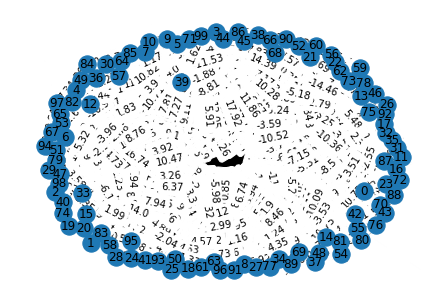

In [13]:
show_graph(G1)

#### Caso 2

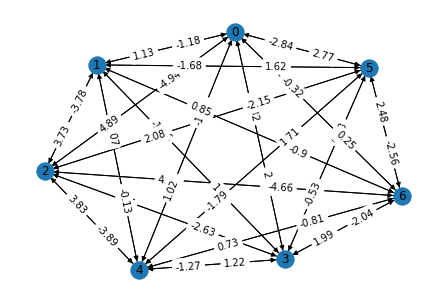

In [14]:
show_graph(G2)

### Aplicando método Bellman Ford

#### Caso 1

In [15]:
sol1 = bf_negative_cycle_cc(G1)

#### Caso 2

In [16]:
sol2 = bf_negative_cycle_cc(G2)

### Ciclo solución

#### Caso 1

In [20]:
print(sol1)

[99, 98, 99]


#### Caso 2

In [21]:
print(sol2)

[5, 6, 5]


### Traduciendo Solución

#### Caso 1

In [23]:
df1 = df1.iloc[sol1]
df1

,Símbolo,Precio
99,DTH,0.005611
98,DEL,0.065131
99,DTH,0.005611


#### Caso 2

In [27]:
df2 = df2.iloc[sol2]
df2

,Símbolo,Precio
5,NEO,16.032580
6,XMR,198.262798
5,NEO,16.032580


### **Referencias:**

**<sup>(1)</sup>** [Bellman-Ford Algorithm](https://www.sciencedirect.com/topics/computer-science/bellman-ford-algorithm).

**<sup>(2)</sup>** [bellman_ford_shortest_paths](https://www.boost.org/doc/libs/1_62_0/libs/graph/doc/bellman_ford_shortest.html)

**<sup>(3)</sup>** [An Analysis of Bellman-Ford and Dijkstra’s Algorithm](https://melitadsouza.github.io/pdf/algos.pdf)

**<sup>(4)</sup>** [6.Minikube y AWS](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/wiki/6.Minikube-y-AWS)

**<sup>(5)</sup>** [Minikube, Kubeflow y Kale 2022](https://www.youtube.com/watch?v=SusT5xQN1ro)